In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
def visualize_graph(G):
    # Position nodes using a layout
    pos = nx.circular_layout(G)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)

    # Draw edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    # Show plot
    plt.show()
    return None

In [ ]:
G.number_of_nodes()

5

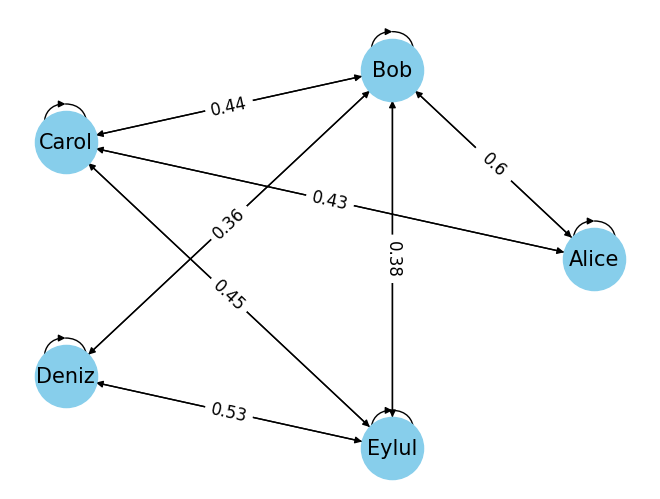

In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes for 5 individuals
G.add_node("Alice")
G.add_node("Bob")
G.add_node("Carol")
G.add_node("Deniz")
G.add_node("Eylul")

# Add edges with weights (transition probabilities)
# Assuming the transitions are between all individuals and themselves
transitions = [

    ("Alice", "Alice", 0.1),
    ("Bob", "Bob", 0.1),
    ("Carol", "Carol", 0.1),
    ("Deniz", "Deniz", 0.1),
    ("Eylul", "Eylul", 0.1),

    ("Alice", "Bob", 0.23),
    ("Bob", "Alice", 0.23),
    ("Bob", "Carol", 0.34),
    ("Carol", "Bob", 0.34),
    ("Alice", "Carol", 0.82),
    ("Carol", "Alice", 0.82),
    # ("Alice", "Eylul", 0.0),
    # ("Eylul", "Alice", 0.0),
    ("Deniz", "Eylul", 0.65),
    ("Eylul", "Deniz", 0.65),
    ("Bob", "Deniz", 0.1),
    ("Deniz", "Bob", 0.1),
    ("Carol", "Eylul", 0.9),
    ("Eylul", "Carol", 0.9),
    # ("Carol", "Deniz", 0.0),
    # ("Deniz", "Carol", 0.0),
    # ("Alice", "Deniz", 0.0),
    # ("Deniz", "Alice", 0.0),
    ("Bob", "Eylul", 0.45),
    ("Eylul", "Bob", 0.45),
]

# Add edges to the graph
for src, dst, weight in transitions:
    G.add_edge(src, dst, weight=np.random.randint(30,70,size=1)[0]/100)

# Position nodes using a layout
pos = nx.circular_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Show plot
plt.show()

In [ ]:
def visualize_graph(G):
    # Position nodes using a layout
    pos = nx.circular_layout(G)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)

    # Draw edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    # Show plot
    plt.show()
    return None

def merge_states(P, summed_states=[1,2,4,8]):
    # Store current states
    current_no_of_states= P.shape[0]
    # Create left matrice with new_state at position -1
    left_mat = np.zeros((current_no_of_states+1,current_no_of_states))
    # Use unity matrix for other states
    left_mat[:current_no_of_states,:current_no_of_states] = np.eye(current_no_of_states)
    # Define new state
    for s in summed_states:
        left_mat[-1,s] = 1
        # Zero out old states
        left_mat[s] = 0
    # Calculate new Transition matrix
    new_P = left_mat@P@left_mat.T
    # Normalize Unified state
    new_P[-1] = new_P[-1]/new_P[-1].sum()
    return new_P

[[1.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.528e-01 7.524e-02 2.291e-01 ... 0.000e+00 0.000e+00 0.000e+00]
 [4.009e-02 5.769e-02 5.102e-02 ... 1.563e-02 1.382e-02 1.989e-02]
 ...
 [5.353e-05 1.624e-04 8.640e-04 ... 2.303e-02 1.225e-01 3.717e-01]
 [1.405e-05 7.856e-05 2.048e-04 ... 3.553e-02 9.264e-02 5.180e-01]
 [2.146e-06 1.897e-05 8.145e-05 ... 1.582e-02 6.794e-02 6.005e-01]]


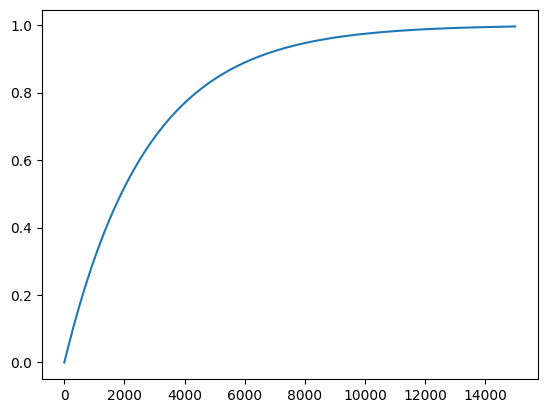

In [ ]:
# Creating a NumPy array 'nums' containing a set of integers
number_of_nodes = G.number_of_nodes()
states = np.arange(2**number_of_nodes)
adj_arr = nx.to_numpy_array(G)

# Creating a binary representation of 'nums' using bitwise operations and reshaping
# The resultant array represents the binary representation of each element in 'nums'
states = ((states.reshape(-1, 1) & (2 ** np.arange(number_of_nodes))) != 0).astype(int)

no_of_states = len(states)
P = np.empty((no_of_states,no_of_states))
for i in range(no_of_states):
    for j in range(no_of_states):
        s_init = states[i]
        s_target = states[j]
        p_healthy = np.prod(1-(s_init * adj_arr), axis=1)
        P[i,j] = np.prod(np.abs(s_target-p_healthy))
np.set_printoptions(precision=3)
print(P)

### NEW STATES ADDED TO POSITION -1###

# There is exactly 1 sick person in total
P_one_person_is_sick = merge_states(P,[s_no for s_no, state in enumerate(states) if state.sum()==1])
# There is exactly 2 sick person in total
P_two_person_is_sick = merge_states(P,[s_no for s_no, state in enumerate(states) if state.sum() in [1,2]])
# There at least 1 sick person
P_somebody_is_sick = merge_states(P,[s_no for s_no, state in enumerate(states) if state.sum()>0])
### NEW STATES ADDED TO POSITION -1###

all_sick_arr = []
one_person_is_sick_arr = []
two_person_is_sick_arr = []
somebody_is_sick_arr = []

only_alice_is_sick_arr = []
only_alice_is_healthy_arr = []
everybody_makes_alice_sick_arr = []

steps = 15000
for i in range(1,steps):
    # Matrix powers
    powered_matrix = np.linalg.matrix_power(P, i)
    P_one_person_is_sick_powered = np.linalg.matrix_power(P_one_person_is_sick, i)
    P_two_person_is_sick_powered = np.linalg.matrix_power(P_two_person_is_sick, i)
    P_somebody_is_sick_powered = np.linalg.matrix_power(P_somebody_is_sick, i)

    # all sick to all healthy
    all_sick_arr.append(powered_matrix[31,0])
    # Exactly 1 person is sick to all healthy
    one_person_is_sick_arr.append(P_one_person_is_sick_powered[-1,0])
    # Exactly 1-2 person is sick to all healthy
    two_person_is_sick_arr.append(P_two_person_is_sick_powered[-1,0])
    # Exactly 1-2 person is sick to all healthy
    somebody_is_sick_arr.append(P_somebody_is_sick_powered[-1,0])

    # Only ALice is sick to all healthy
    only_alice_is_sick_arr.append(powered_matrix[1,0])
    # Everybody except ALice is sick to all healthy
    only_alice_is_healthy_arr.append(powered_matrix[30,0])
    # Everybody except ALice is sick to only Alice is sick
    everybody_makes_alice_sick_arr.append(powered_matrix[30,1])


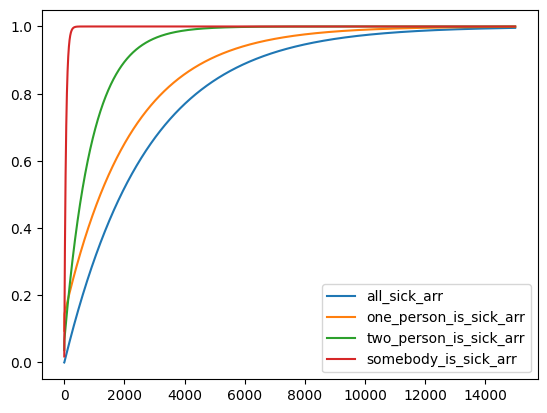

In [ ]:
plt.plot(all_sick_arr, label="all_sick_arr")
plt.plot(one_person_is_sick_arr, label="one_person_is_sick_arr")
plt.plot(two_person_is_sick_arr, label="two_person_is_sick_arr")
plt.plot(somebody_is_sick_arr, label="somebody_is_sick_arr")

# plt.plot(only_alice_is_sick_arr, label="only_alice_is_sick_arr")
# plt.plot(only_alice_is_healthy_arr, label="only_alice_is_healthy_arr")
# plt.plot(everybody_makes_alice_sick_arr, label="everybody_makes_alice_sick_arr")

plt.legend()

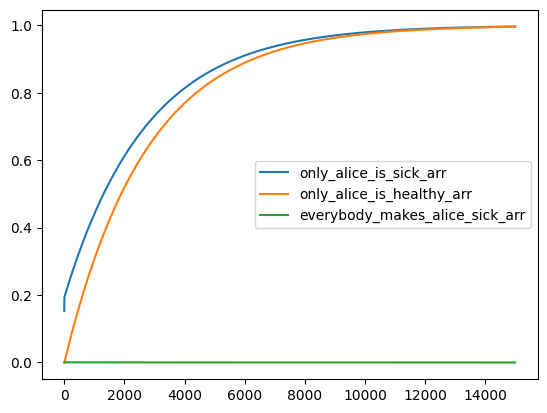

In [ ]:
plt.plot(only_alice_is_sick_arr, label="only_alice_is_sick_arr")
plt.plot(only_alice_is_healthy_arr, label="only_alice_is_healthy_arr")
plt.plot(everybody_makes_alice_sick_arr, label="everybody_makes_alice_sick_arr")

plt.legend()

7.736873107365126e-05


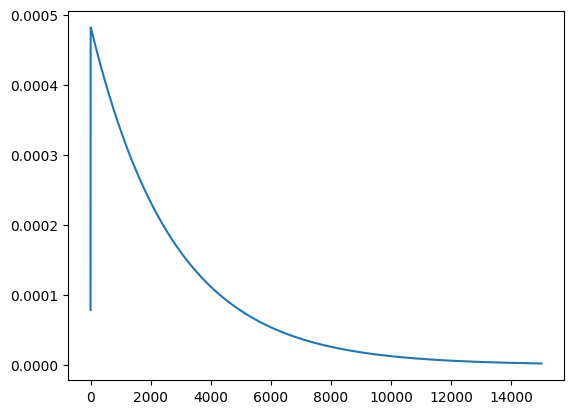

In [ ]:
plt.plot(everybody_makes_alice_sick_arr)
print(everybody_makes_alice_sick_arr[5000])

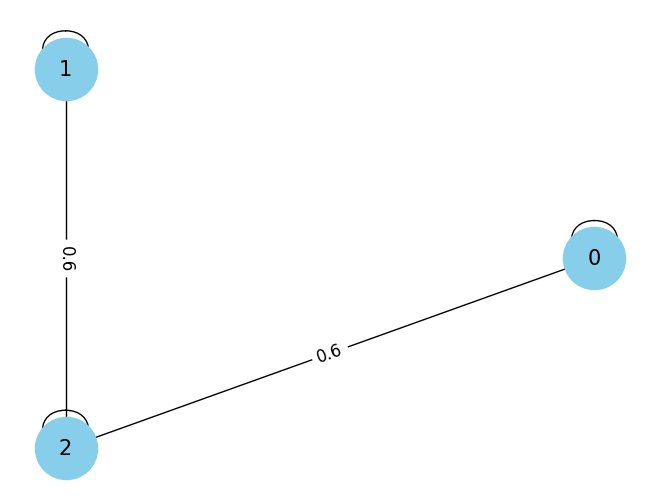

In [ ]:
# Graph Attributes
N = 3 # No of people
edge_probability = 0.8 # Probability of an edge between two random nodes
# Disease Attributes
transmission_probability = 0.6 # Probability to transmit someonelse
self_probability = 0.5 # Probability to self transmit (to next week)

# Generate the random Erdos-Renyi Graph
random_g1 = nx.gnp_random_graph(N, edge_probability, seed=0)

# Get Adjacency Matrix
adj_arr = nx.to_numpy_array(random_g1)
# Set weights between nodes
adj_arr = adj_arr*transmission_probability
# Set weights of self loops
adj_arr[range(adj_arr.shape[0]),range(adj_arr.shape[1])] = self_probability

random_g1 = nx.from_numpy_array(adj_arr)
visualize_graph(random_g1)

[[1.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.2   0.2   0.    0.    0.3   0.3   0.    0.   ]
 [0.2   0.    0.2   0.    0.3   0.    0.3   0.   ]
 [0.04  0.04  0.04  0.04  0.21  0.21  0.21  0.21 ]
 [0.08  0.12  0.12  0.18  0.08  0.12  0.12  0.18 ]
 [0.016 0.064 0.024 0.096 0.064 0.256 0.096 0.384]
 [0.016 0.024 0.064 0.096 0.064 0.096 0.256 0.384]
 [0.003 0.013 0.013 0.051 0.037 0.147 0.147 0.589]]


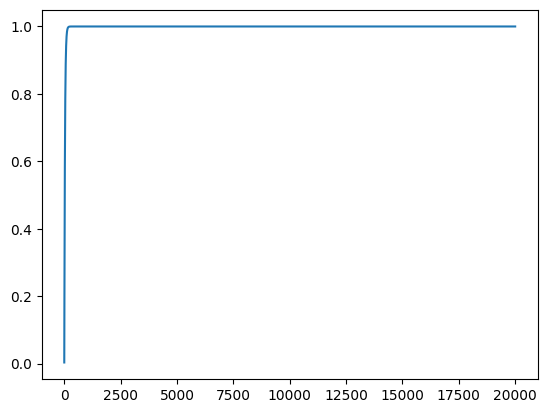

In [ ]:
# Creating a NumPy array 'nums' containing a set of integers
number_of_nodes = random_g1.number_of_nodes()
states = np.arange(2**number_of_nodes)

# Creating a binary representation of 'nums' using bitwise operations and reshaping
# The resultant array represents the binary representation of each element in 'nums'
states = ((states.reshape(-1, 1) & (2 ** np.arange(number_of_nodes))) != 0).astype(int)

no_of_states = len(states)
P = np.empty((no_of_states,no_of_states))
for i in range(no_of_states):
    for j in range(no_of_states):
        s_init = states[i]
        s_target = states[j]
        p_healthy = np.prod(1-(s_init * adj_arr), axis=1)
        P[i,j] = np.prod(np.abs(s_target-p_healthy))
np.set_printoptions(precision=3)
print(P)

all_sick_arr = []
only_first_is_sick_arr = []
single_sick_arr = []
there_are_4_sick_arr = []
two_sick_arr = []
steps = 20000
for i in range(1,20000):
    powered_matrix = np.linalg.matrix_power(P, i)
    all_sick_arr.append(powered_matrix[7,0]) # all sick to all healthy
plt.plot(all_sick_arr)

In [ ]:
# def merge_states(P_matrix, state_list=[1,2,4,8]):
no_of_nodes = P.shape[0]
left_matrix = np.eye(no_of_nodes)
left_matrix[1] = left_matrix[1]+left_matrix[2]+left_matrix[4]
left_matrix[2] = 0
left_matrix[4] = 0
left_matrix
new_mat = np.matmul(left_matrix,P)
# Normalize
left_matrix = (left_matrix.T/((left_matrix.sum(axis=1))+1e-16)).T
new_mat = np.matmul(new_mat,left_matrix.T)
new_mat.sum(axis=1)

array([1.   , 2.12 , 0.   , 0.807, 0.   , 0.899, 0.899, 0.958])

In [ ]:
new_mat

array([[1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.2  , 0.067, 0.067, 0.   , 0.067, 0.3  , 0.   , 0.   ],
       [0.2  , 0.067, 0.067, 0.   , 0.067, 0.3  , 0.   , 0.   ],
       [0.04 , 0.013, 0.013, 0.04 , 0.013, 0.21 , 0.21 , 0.21 ],
       [0.2  , 0.067, 0.067, 0.   , 0.067, 0.3  , 0.   , 0.   ],
       [0.016, 0.021, 0.021, 0.096, 0.021, 0.256, 0.096, 0.384],
       [0.016, 0.008, 0.008, 0.096, 0.008, 0.096, 0.256, 0.384],
       [0.003, 0.004, 0.004, 0.051, 0.004, 0.147, 0.147, 0.589]])

In [ ]:
(left_matrix.T/(np.sqrt(left_matrix.sum(axis=1))+1e-16)).T

array([[1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.439, 0.439, 0.   , 0.439, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   ]])

In [ ]:
(left_matrix.T/((left_matrix.sum(axis=1))+1e-16)).T

array([[1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.333, 0.333, 0.   , 0.333, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   ]])

In [ ]:
new_mat@new_mat@new_mat@new_mat@new_mat@new_mat@new_mat@new_mat@new_mat

array([[1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.778, 0.102, 0.   , 0.066, 0.   , 0.159, 0.159, 0.393],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.327, 0.072, 0.   , 0.047, 0.   , 0.112, 0.112, 0.277],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.281, 0.077, 0.   , 0.05 , 0.   , 0.12 , 0.12 , 0.296],
       [0.281, 0.077, 0.   , 0.05 , 0.   , 0.12 , 0.12 , 0.296],
       [0.247, 0.08 , 0.   , 0.052, 0.   , 0.125, 0.125, 0.311]])

In [ ]:
np.sqrt(left_matrix.sum(axis=1))+1e-16

array([1.000e+00, 1.732e+00, 1.000e-16, 1.000e+00, 1.000e-16, 1.000e+00,
       1.000e+00, 1.000e+00])

In [ ]:
left_matrix

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 5.774e-01, 1.000e+16, 0.000e+00, 1.000e+16, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]])

In [ ]:
new_mat

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [2.800e+07, 7.000e+15, 0.000e+00, 1.800e+07, 0.000e+00, 1.200e+07,
        4.200e+07, 1.800e+07],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [4.000e-02, 2.500e+07, 0.000e+00, 4.000e-02, 0.000e+00, 2.100e-01,
        2.100e-01, 2.100e-01],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [1.600e-02, 8.800e+06, 0.000e+00, 9.600e-02, 0.000e+00, 2.560e-01,
        9.600e-02, 3.840e-01],
       [1.600e-02, 1.280e+07, 0.000e+00, 9.600e-02, 0.000e+00, 9.600e-02,
        2.560e-01, 3.840e-01],
       [3.200e-03, 4.960e+06, 0.000e+00, 5.120e-02, 0.000e+00, 1.472e-01,
        1.472e-01, 5.888e-01]])

array([1., 3., 0., 1., 0., 1., 1., 1.])

In [ ]:
left_matrix[0] + left_matrix[1]

array([1., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
state_list = [1,2,4]
P, state_list

(array([[1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.2  , 0.2  , 0.   , 0.   , 0.3  , 0.3  , 0.   , 0.   ],
        [0.2  , 0.   , 0.2  , 0.   , 0.3  , 0.   , 0.3  , 0.   ],
        [0.04 , 0.04 , 0.04 , 0.04 , 0.21 , 0.21 , 0.21 , 0.21 ],
        [0.08 , 0.12 , 0.12 , 0.18 , 0.08 , 0.12 , 0.12 , 0.18 ],
        [0.016, 0.064, 0.024, 0.096, 0.064, 0.256, 0.096, 0.384],
        [0.016, 0.024, 0.064, 0.096, 0.064, 0.096, 0.256, 0.384],
        [0.003, 0.013, 0.013, 0.051, 0.037, 0.147, 0.147, 0.589]]),
 [1, 2, 4])

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 2., 0., 2., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
my_P = np.array([
    [0, 0.4, 0.6,],
    [0.2, 0.8, 0,],
    [0, 0, 1]])
my_P

array([[0. , 0.4, 0.6],
       [0.2, 0.8, 0. ],
       [0. , 0. , 1. ]])

In [ ]:
def merge_states(P, summed_states=[1,2,4,8]):
    # Store current states
    current_no_of_states= P.shape[0]
    # new_state = summed_states[0] u summed_states[1] u ...
    summed_states = [0,1]
    # Create left matrice with new_state at position -1
    left_mat = np.zeros((current_no_of_states+1,current_no_of_states))
    # Use unity matrix for other states
    left_mat[:current_no_of_states,:current_no_of_states] = np.eye(current_no_of_states)
    # Define new state
    for s in summed_states:
        left_mat[-1,s] = 1
        # Zero out old states
        left_mat[s] = 0
    # Calculate new Transition matrix
    new_P = left_mat@P@left_mat.T
    # Normalize Unified state
    new_P[-1] = new_P[-1]/new_P[-1].sum()
    return new_P

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [1., 1., 0.]])

In [ ]:
left_mat

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [1., 1., 0.]])

In [ ]:
out = left_mat@my_P@left_mat.T
out[-1] = out[-1]/out[-1].sum()
# for state in summed_states:
#     out[state,:]=0
#     out[:,state]=0
#     out[state,state]=1
out

array([[0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 0.3, 0.7]])

In [ ]:
out@out@out@out@out@out@out@out@out@out@out@out@out@out

array([[0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.993, 0.007]])

In [ ]:
left_mat.shape

(4, 4)